<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/05_01_UCS_dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breadth First Search

BFS para los amigos

In [ ]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import math

In [ ]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

## Dijkstra

In [ ]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [None]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(0, s)]
  while queue:
    g_u, u = hq.heappop(queue)
    if not visite[u]:
      visited[u] = True
      for v, w in G[u]:
        f = g_u + w
        if f < cost[v]:
          cost[v] = f
          path[v] = u
          hq.heappush(queue, (f, v))

  return path, cost

In [ ]:
%%file 1.in
2|4 7|8 14|3
2|7 5|7
0|4 1|7 3|5 6|1
2|5
7|7
1|7 6|1 8|5
2|1 5|1
0|8 4|7 8|8
5|5 7|8 9|8 11|9 12|6
8|8 10|8 12|9 13|7
9|8 13|3
8|9
8|6 9|9 13|2 15|5
9|7 10|13 12|2 16|9
0|3 15|9
12|5 14|9 17|7
13|9 17|8
15|7 16|8

Writing 1.in


 0: [(2, 4), (7, 8), (14, 3)]
 1: [(2, 7), (5, 7)]
 2: [(0, 4), (1, 7), (3, 5), (6, 1)]
 3: [(2, 5)]
 4: [(7, 7)]
 5: [(1, 7), (6, 1), (8, 5)]
 6: [(2, 1), (5, 1)]
 7: [(0, 8), (4, 7), (8, 8)]
 8: [(5, 5), (7, 8), (9, 8), (11, 9), (12, 6)]
 9: [(8, 8), (10, 8), (12, 9), (13, 7)]
10: [(9, 8), (13, 3)]
11: [(8, 9)]
12: [(8, 6), (9, 9), (13, 2), (15, 5)]
13: [(9, 7), (10, 13), (12, 2), (16, 9)]
14: [(0, 3), (15, 9)]
15: [(12, 5), (14, 9), (17, 7)]
16: [(13, 9), (17, 8)]
17: [(15, 7), (16, 8)]


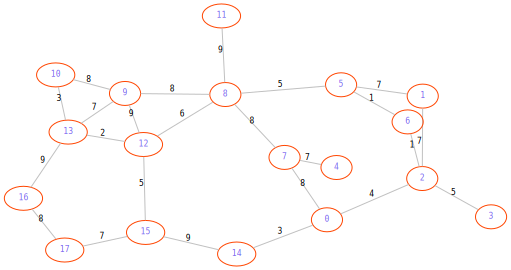

In [ ]:
G, _ = readAdjl("1.in", weighted=True)
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

[2, 5, 6, 2, 7, 8, 5, 8, None, 8, 9, 8, 8, 12, 0, 12, 13, 15]


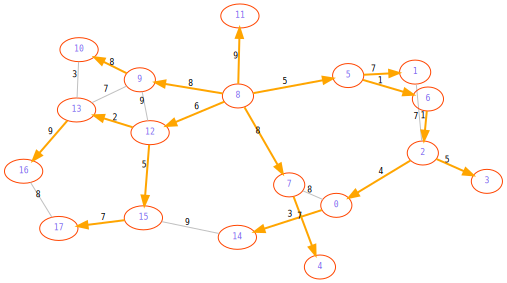

In [ ]:
path, cost = dijkstra(G, 8)
print(path)
adjlShow(G, weighted=True, path=path)